In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
import scikit_posthocs as sp
from scipy import signal

In [2]:
# Pathways
outpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity'
figpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure'
source = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final'

In [3]:
#load single flight path
df = pd.read_csv(source + '\Centroids_Final_Experimental_1_52523.csv')

In [4]:
def removeNaN(df): 
    if np.any(df.X_position.isnull()):
        a = np.asarray(np.where(df.X_position.isnull())).ravel()
        b = a[1:]
        c = a[:-1]
        d = b-c
        last_chunk = len(df.X_position) - a[-1]


        if last_chunk > 100:

            start = a[-1]+1
            end = a[-1] + last_chunk-1

        elif a[0] > 100:
            start = 0
            end = a[0]-1


        elif d.max() > 100:
            e = d.argmax()
            start = a[e]+1
            end = a[e+1]-1

        else:
            print('error')
    
        x_no_nan = df.X_position.values[start:end]
        y_no_nan = df.Y_position.values[start:end]
        return(x_no_nan, y_no_nan)
    else:
        x = df.X_position.values
        y = df.Y_position.values
        return(x,y)

In [5]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data, padlen = 2 * max(len(a), len(b)))
    return y

In [6]:
def gaussian(x,y):
    gauss = signal.gaussian(7,3)
    x_gauss = signal.convolve(x, gauss, mode='same', method = 'direct') / gauss.sum()
    y_gauss = signal.convolve(y, gauss, mode = 'same', method = 'direct') / gauss.sum()
    return(x_gauss, y_gauss)

In [7]:
def tortuosity_difference(x,y,x_smooth,y_smooth):
    x = x[3:-2]
    y = y[3:-2]
    x_smooth = x_smooth[3:-2]
    y_smooth = y_smooth[3:-2]
    i = 0
    d_list = []
    for element in x:
        dist = np.sqrt((x[i]-x_gauss[i])**2 + (y[i]-y_gauss[i])**2)
        i+=1
        d_list.append(dist)    
    mean_d = np.mean(d_list)
    std_d = np.std(d_list)
    return(mean_d, std_d)

In [8]:
def tortuosity_ratio(x,y,x_smooth, y_smooth):
    i =1
    L_list = []
    for element in x: 
        if i < len(x):
            L_ = np.sqrt((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2)
            i+=1
            L_list.append(L_)
    L = np.sum(L_list)
    i = 1
    L_prime_list = []
    for element in x_smooth:
        if i < len(x_smooth):
            L_prime_ = np.sqrt((x_smooth[i]-x_smooth[i-1])**2 + (y_smooth[i]-y_smooth[i-1])**2)
            i+=1
            L_prime_list.append(L_prime_)
    L_prime = np.sum(L_prime_list)
    t_r = L/L_prime
    return(t_r)

In [9]:
x, y = removeNaN(df)
x_gauss, y_gauss = gaussian(x,y)
t_r = tortuosity_ratio(x,y,x_gauss, y_gauss)
mean, std = tortuosity_difference(x,y,x_gauss, y_gauss)

In [10]:
t_r

1.563183591493542

In [11]:
t = df.loc[0:len(x),'FrameNumber']/100
Time = t[len(t)-1]-t[0]
Time

4.659999999999968

C:\Users\Daniellab\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


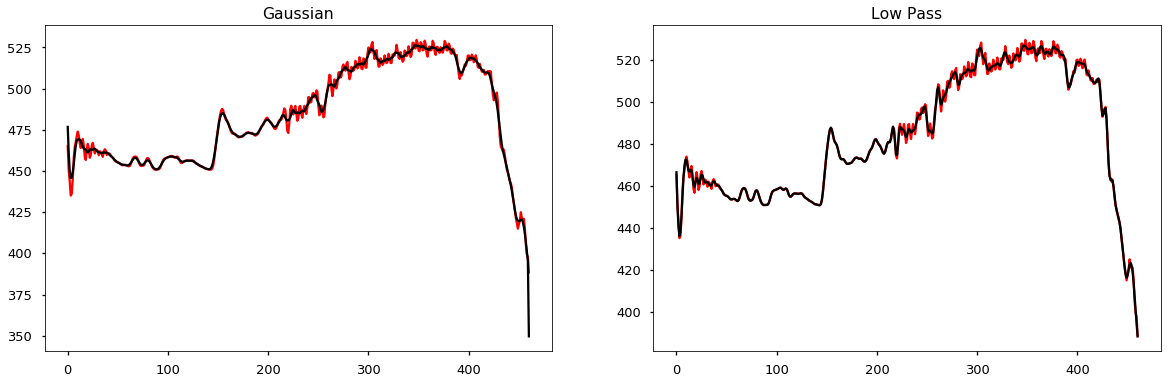

In [12]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
x_filtered = butter_lowpass_filter(x, 20, len(y)/Time, order = 5)
ax[0].set_title("Gaussian")
ax[0].plot(x[3:-2], c = "r")
ax[0].plot(x_gauss[3:-2], c = "k")
ax[1].set_title("Low Pass")
ax[1].plot(x[3:-2], 'r')
ax[1].plot(x_filtered[3:-2], 'k')

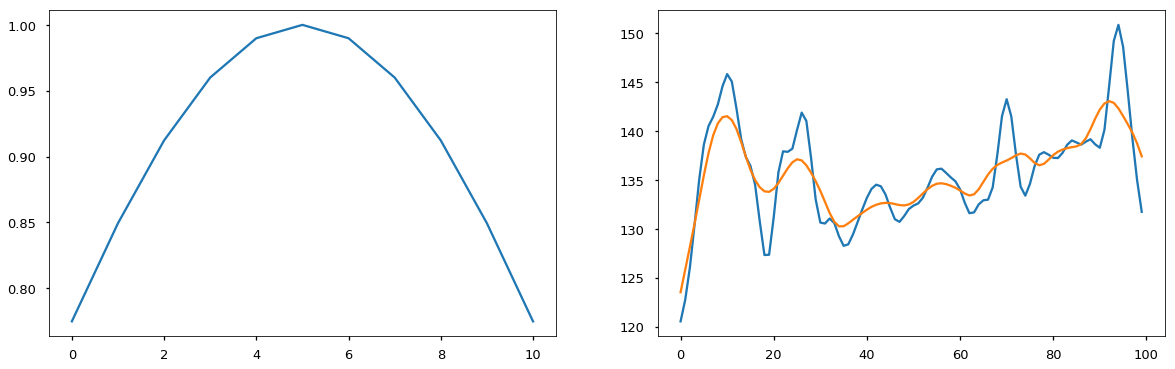

In [65]:
f, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[1].plot(y_filtered[300:400])

gauss = signal.gaussian(11,7)
ax[0].plot(gauss)
x_gauss = signal.convolve(x_filtered, gauss, mode = 'same', method = 'direct') / gauss.sum()
y_gauss = signal.convolve(y_filtered, gauss, mode = 'same', method = 'direct') / gauss.sum()
ax[1].plot(y_gauss[300:400])

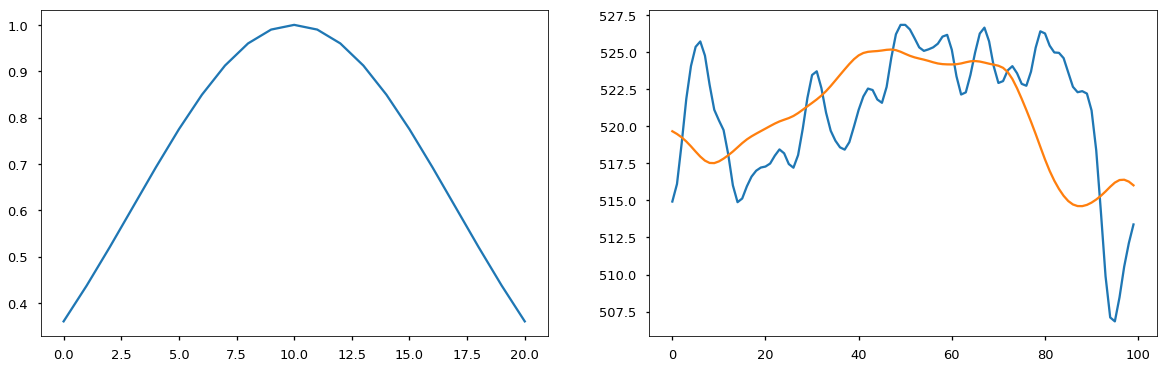

In [103]:
f, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[1].plot(x_filtered[300:400])

gauss = signal.gaussian(21,7)
ax[0].plot(gauss)
x_gauss = signal.convolve(x_filtered, gauss, mode = 'valid', method = 'direct') / gauss.sum()
y_gauss = signal.convolve(y_filtered, gauss, mode = 'same', method = 'direct') / gauss.sum()
ax[1].plot(x_gauss[300:400])

In [104]:
print(len(x_filtered)-len(x_gauss))

20


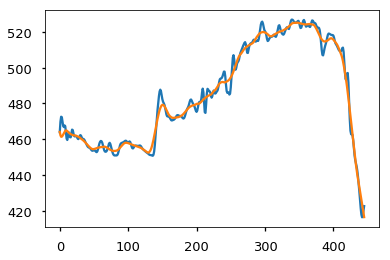

In [105]:
plt.plot(x_filtered[10:-10])
plt.plot(x_gauss)

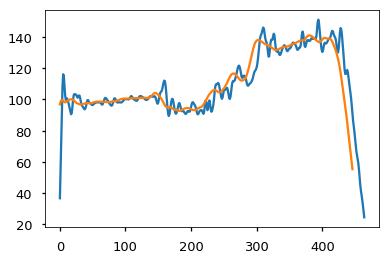

In [92]:
plt.plot(y_filtered[:-1])
plt.plot(y_gauss)

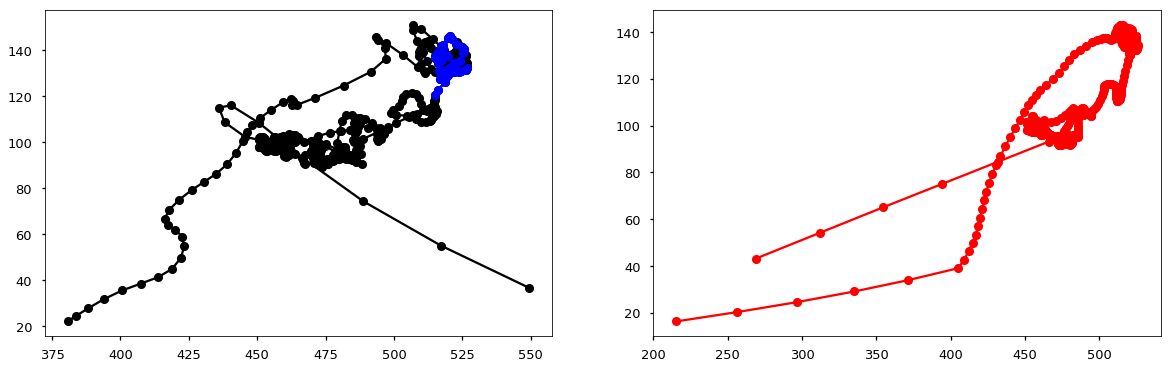

In [67]:
f, ax = plt.subplots(1,2, figsize = (20,6))
ax[0].plot(x_filtered, y_filtered
           , 'o-'
           , c = 'k')
ax[0].plot(x_filtered[300:350], y_filtered[300:350]
           , 'o-'
           , c = 'b')

ax[1].plot(x_gauss, y_gauss
           , 'o-'
           ,c = 'r')

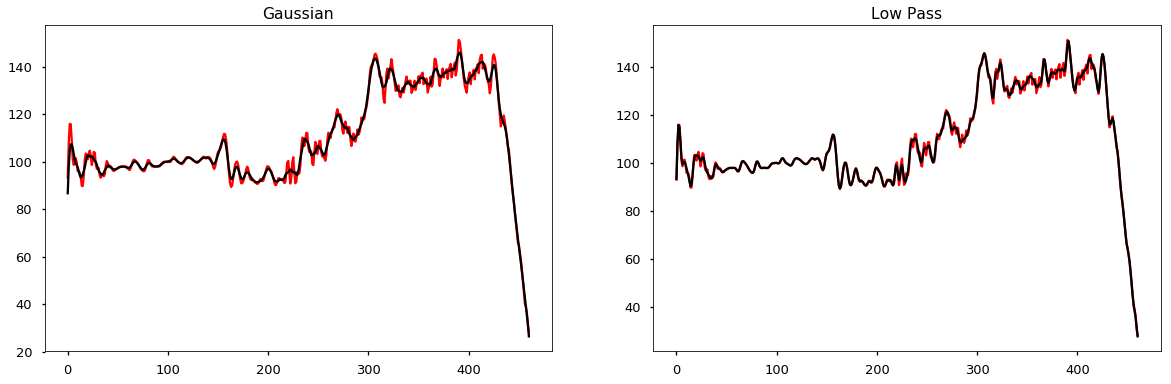

In [18]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
y_filtered = butter_lowpass_filter(y, 20, len(y)/Time, order = 5)
ax[0].set_title("Gaussian")
ax[0].plot(y[3:-2], c = "r")
ax[0].plot(y_gauss[3:-2], c = "k")
ax[1].set_title("Low Pass")
ax[1].plot(y[3:-2], 'r')
ax[1].plot(y_filtered[3:-2], 'k')

In [14]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

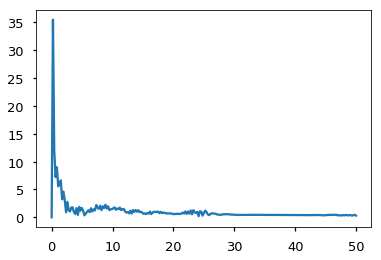

In [15]:
xf = np.linspace(0.0, 1.0/(2.0*1/((len(x)/Time))), len(x)//2)
plt.plot(xf, 2.0/len(x) * np.abs(fft(x-mean(x))[0:len(x)//2]))

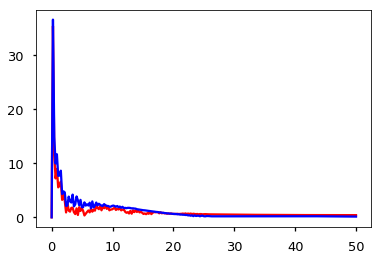

In [16]:
xf = np.linspace(0.0, 1.0/(2.0*1/((len(x_gauss)/Time))), len(x_gauss)//2)
plt.plot(xf, 2.0/len(x_filtered) * np.abs(fft(x_filtered-mean(x_filtered))[0:len(x)//2]), "r")
plt.plot(xf, 2.0/len(x_gauss) * np.abs(fft(x_gauss-mean(x_gauss))[:len(x_gauss)//2]), "b")
